# Binary Classification with ScratchML Logistic Regression

In [1]:
import sys
sys.path.append("../")
%load_ext autoreload
%autoreload 2

## Preprocess

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
%matplotlib inline  

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# extract only class labels 1's and zeroes for binary classification
X_train = X_train[(y_train == 0) | (y_train == 1)]
y_train = y_train[(y_train == 0) | (y_train == 1)]

X_test = X_test[(y_test == 0) | (y_test == 1)]
y_test = y_test[(y_test == 0) | (y_test == 1)]

In [5]:
# normalize features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# ScratchML Logistic Regression

## Train

In [6]:
from ScratchML.models import LogisticRegression

clf = LogisticRegression(learning_rate=0.05, n_iteration=30)
clf.fit(X_train_std, y_train)

100%|██████████| 30/30 [00:00<00:00, 189.79it/s]


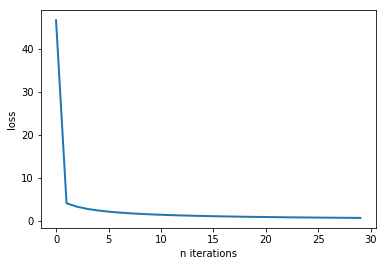

In [7]:
from ScratchML.plot import plot_loss
plot_loss(clf.loss)

## Evaluate

In [8]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 1.00


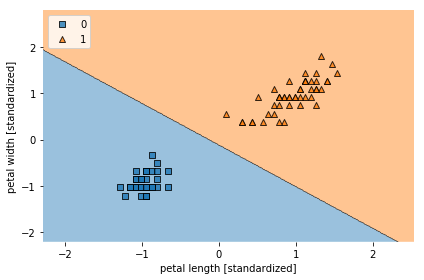

In [9]:
from ScratchML.plot import plot_decision_regions
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(
    X=X_combined_std,
    Y=y_combined,
    classifier=clf,
    xlabel='petal length [standardized]',
    ylabel='petal width [standardized]'
)

# Scikit-Learn LogisticRegression

## Train

In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Evaluate

In [11]:
y_pred = clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 1.00


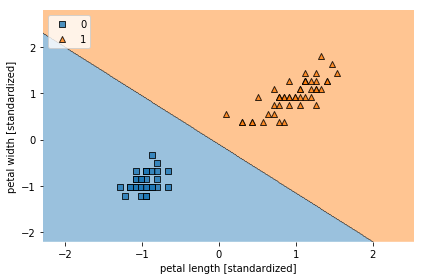

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(
    X=X_combined_std,
    Y=y_combined,
    classifier=clf,
    xlabel='petal length [standardized]',
    ylabel='petal width [standardized]'
)